In [1]:
from ecmwf.opendata import Client
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
client = Client()

client.retrieve(
    date=20230712,
    time=0,
    step=[step for step in range(0, 144, 6)],
    # type="ef",
    stream="enfo",
    param=["2t"],
    target="data.grib2",
)

MARS post-processing keywords {'area'} not supported


Doc here: https://github.com/ecmwf/ecmwf-opendata<br>
<br>And here:<br> https://events.ecmwf.int/event/296/contributions/3248/attachments/1883/3385/UEF2022_Vuckovic.pdf<br>
<br>And here, too:<br> https://pypi.org/project/ecmwf-opendata/

In [4]:
# ds = xr.open_dataset('data.grib2', engine='cfgrib', 
#                      backend_kwargs={'filter_by_keys':{'typeOfLevel': 'heightAboveGround','level':2}})
# ds = xr.open_dataset('data.grib2', engine='cfgrib', 
#                      backend_kwargs={'filter_by_keys':{'typeOfLevel':'isobaricInhPa', 'level': 500}})

ds = xr.open_dataset('data.grib2', engine='cfgrib',
                      backend_kwargs={'filter_by_keys':{'dataType': 'pf', 'typeOfLevel': 'heightAboveGround','level':2}})


Ignoring index file 'data.grib2.9810b.idx' older than GRIB file


In [5]:
ds

<xarray.Dataset>
Dimensions:            (number: 50, step: 24, latitude: 451, longitude: 900)
Coordinates:
  * number             (number) int64 1 2 3 4 5 6 7 8 ... 44 45 46 47 48 49 50
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 0 days 00:00:00 ... 5 days 18:0...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude          (longitude) float64 -180.0 -179.6 -179.2 ... 179.2 179.6
    valid_time         (step) datetime64[ns] ...
Data variables:
    t2m                (number, step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-07-12T19:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
ens_temps = ds.t2m.sel(latitude=32.897480, longitude=-97.040443, method='nearest')

In [7]:
df = ens_temps.to_dataframe('temp')
df.dropna(inplace=True)
df.reset_index(inplace=True)
df['temp'] = (df['temp'] - 273.15) * 9/5 + 32
df

,number,step,time,heightAboveGround,latitude,longitude,valid_time,temp
0,1,0 days 00:00:00,2023-07-12,2.0,32.8,-97.2,2023-07-12 00:00:00,94.924026
1,1,0 days 06:00:00,2023-07-12,2.0,32.8,-97.2,2023-07-12 06:00:00,79.214790
2,1,0 days 12:00:00,2023-07-12,2.0,32.8,-97.2,2023-07-12 12:00:00,82.253830
3,1,0 days 18:00:00,2023-07-12,2.0,32.8,-97.2,2023-07-12 18:00:00,98.294357
4,1,1 days 00:00:00,2023-07-12,2.0,32.8,-97.2,2023-07-13 00:00:00,100.259048
...,...,...,...,...,...,...,...,...
1195,50,4 days 18:00:00,2023-07-12,2.0,32.8,-97.2,2023-07-16 18:00:00,96.548248
1196,50,5 days 00:00:00,2023-07-12,2.0,32.8,-97.2,2023-07-17 00:00:00,87.701454
1197,50,5 days 06:00:00,2023-07-12,2.0,32.8,-97.2,2023-07-17 06:00:00,84.458344
1198,50,5 days 12:00:00,2023-07-12,2.0,32.8,-97.2,2023-07-17 12:00:00,80.974411


In [8]:
df_ens_members = df.groupby(['number'])

Text(0.5, 1.0, 'ECMWF Ensemble Members - 2m Temperature (F)')

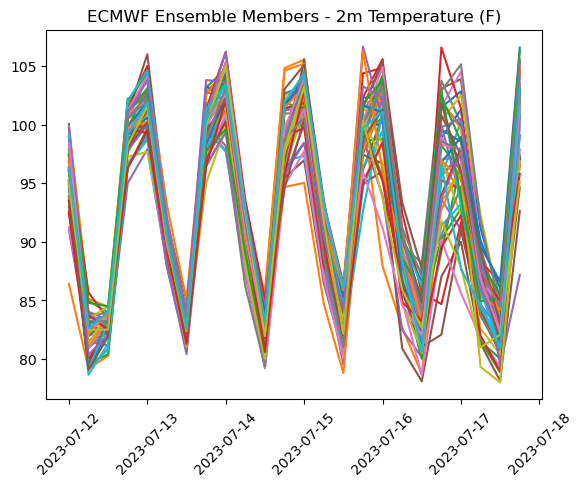

In [9]:
for group, group_data in df_ens_members:
    plt.plot(group_data['valid_time'], group_data['temp'], label=group)

plt.xticks(rotation = 45)
plt.title('ECMWF Ensemble Members - 2m Temperature (F)')